In [1]:
pip install brian2

     |████████████████████████████████| 1.2MB 5.5MB/s 
     |████████████████████████████████| 5.9MB 19.4MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp36-cp36m-linux_x86_64.whl size=1257517 sha256=871d6f20b1fc44ee71131ec81812fa1ca34d6970c6e62cb22ebe36e5b80b8951
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [2]:
%matplotlib inline
import numpy as np
from brian2 import *

#1

##1.1

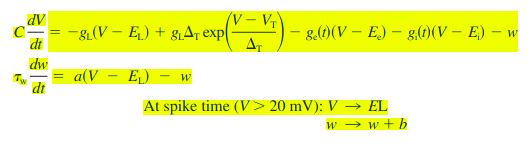

در لحظه رخ دادن اسپایک 

V

را به ولتاژ نشتی بازنشانی می کنیم.

همچنین

w

را به اندازه 

b

افزایش می دهیم

In [ ]:
C=281*pF #membrane capacity.
g_L=30*nS#leak conductance
E_L=-70.6*mV#resting potential
V_T=-50.4*mV#spike threshold
delta_T=2*mV#determines smoothness of dV exponential part
tau_w=144*ms#adaptaion variable (w) time constant.w itself helps v to go back to its resting voltage where-ever it is.this variable helps 
            #modelling different classes of neurons.
a=4*nS#determines level of adaptaion when V is in subthreshold state
b=0.0805*nA #helps modelling some characteristics related to spikes in certain neuron classes

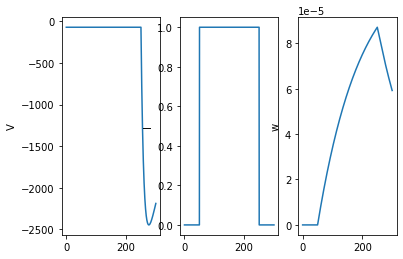

In [ ]:
start_scope()
eqs='''
dV/dt=(-g_L*(V-E_L)+g_L*delta_T*exp((V-V_T)/delta_T)-w+I)/C : volt
dw/dt=(a*(V-E_L)-w)/tau_w : amp
I=(floor((sign(t/ms-50)+1)/2)-floor((sign(t/ms-250)+1)/2))*mA : amp
'''
G=NeuronGroup(1,eqs,threshold='V>(V_T+5*delta_T)',reset='V=E_L;w=w+b',method='exponential_euler')
G.V=E_L
G.w=0*mA
M = StateMonitor(G,('V','I','w'),record=0)
run(300*ms)
subplot(131)
plot(M.t/ms,M.V[0]/mV)
ylabel('V')
subplot(132)
plot(M.t/ms,M.I[0]/mA)
ylabel('I')
subplot(133)
plot(M.t/ms,M.w[0]/mA)
ylabel('w')
show()

##1.2

In [ ]:
start_scope()
eqs='''
dV/dt=(-g_L*(V-E_L)+g_L*delta_T*exp((V-V_T)/delta_T)-w+I)/C : volt
dw/dt=(a*(V-E_L)-w)/tau_w : amp
I=(floor((sign(t/ms-50)+1)/2)-floor((sign(t/ms-250)+1)/2))*mA : amp
'''
G=NeuronGroup(1,eqs,threshold='V>(V_T+5*delta_T)',reset='V=20*mV;w=w+b',method='exponential_euler')
G.V=E_L
G.w=0*mA
S=SpikeMonitor(G)
run(300*ms)
print(S.t/ms)

[ 50.1  50.2  50.3 ... 299.7 299.8 299.9]


##1.3

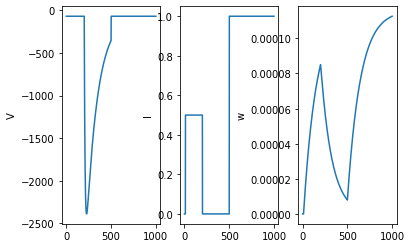

In [ ]:
start_scope()
eqs='''
dV/dt=(-g_L*(V-E_L)+g_L*delta_T*exp((V-V_T)/delta_T)-w+I)/C : volt
dw/dt=(a*(V-E_L)-w)/tau_w : amp
I=((floor((sign(t/ms-10)+1)/2)-floor((sign(t/ms-200)+1)/2))*0.5+floor((sign(t/ms-500)+1)/2)-floor((sign(t/ms-1000)+1)/2))*mA : amp
'''
G=NeuronGroup(1,eqs,threshold='V>(V_T+5*delta_T)',reset='V=E_L;w=w+b',method='exponential_euler')
G.V=E_L
G.w=0*mA
M = StateMonitor(G,('V','I','w'),record=0)
run(1000*ms)
subplot(131)
plot(M.t/ms,M.V[0]/mV)
ylabel('V')
subplot(132)
plot(M.t/ms,M.I[0]/mA)
ylabel('I')
subplot(133)
plot(M.t/ms,M.w[0]/mA)
ylabel('w')
show()

##1.4

Answer:Due to subthreshold adaptation induced by w 

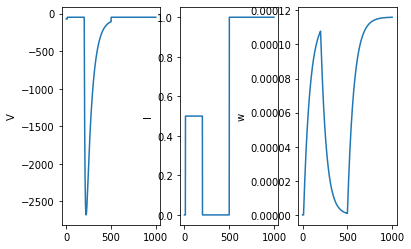

In [ ]:
############
tau_w=72*ms#
b=161*pA   # change parameters. 
###########

start_scope()
eqs='''
dV/dt=(-g_L*(V-E_L)+g_L*delta_T*exp((V-V_T)/delta_T)-w+I)/C : volt
dw/dt=(a*(V-E_L)-w)/tau_w : amp
I=((floor((sign(t/ms-10)+1)/2)-floor((sign(t/ms-200)+1)/2))*0.5+floor((sign(t/ms-500)+1)/2)-floor((sign(t/ms-1000)+1)/2))*mA : amp
'''
G=NeuronGroup(1,eqs,threshold='V>(V_T+5*delta_T)',reset='V=V_T+3*mV;w=w+b',method='exponential_euler')
G.V=E_L
G.w=0*mA
M = StateMonitor(G,('V','I','w'),record=0)
run(1000*ms)
subplot(131)
plot(M.t/ms,M.V[0]/mV)
ylabel('V')
subplot(132)
plot(M.t/ms,M.I[0]/mA)
ylabel('I')
subplot(133)
plot(M.t/ms,M.w[0]/mA)
ylabel('w')
show()

##1.5

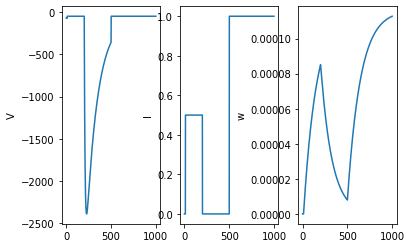

In [ ]:
C=281*pF
g_L=30*nS
E_L=-70.6*mV
V_T=-50.4*mV+3*mV
delta_T=2*mV
tau_w=144*ms
a=4*nS
b=0.0805*nA
start_scope()
eqs='''
dV/dt=(-g_L*(V-E_L)+g_L*delta_T*exp((V-V_T)/delta_T)-w+I)/C : volt
dw/dt=(a*(V-E_L)-w)/tau_w : amp
I=((floor((sign(t/ms-10)+1)/2)-floor((sign(t/ms-200)+1)/2))*0.5+floor((sign(t/ms-500)+1)/2)-floor((sign(t/ms-1000)+1)/2))*mA : amp
'''
G=NeuronGroup(1,eqs,threshold='V>(V_T+5*delta_T)',reset='V=V_T;w=w+b',method='exponential_euler')
G.V=E_L
G.w=0*mA
M = StateMonitor(G,('V','I','w'),record=0)
run(1000*ms)
subplot(131)
plot(M.t/ms,M.V[0]/mV)
ylabel('V')
subplot(132)
plot(M.t/ms,M.I[0]/mA)
ylabel('I')
subplot(133)
plot(M.t/ms,M.w[0]/mA)
ylabel('w')
show()

#2

In [ ]:
dt=0.01
Duration=20000
Cm=1
gNa=120
gK=36
gl=0.3
ENa=55
EK=-72
El=-49.4
vr=-60

In [ ]:
t=0
Iext=0
n=0
m=0
h=0
v=vr
t_vec=[]
v_vec=[]
n_vec=[]
m_vec=[]
h_vec=[]
tau_n_vec=[]
n_inf_vec=[]
tau_m_vec=[]
m_inf_vec=[]
tau_h_vec=[]
h_inf_vec=[]
while t<=Duration:
  if t<5000:
    Iext=2
  else:
    Iext=0
  t_vec+=[t]
  dv=(gl*(El-v)-gNa*m**3*h*(v-ENa)-gK*n**4*(v-EK)+Iext)/Cm*dt
  v_vec+=[v]
  ############
  u=vr-v
  alpha_n=(.1*u+1)/(exp(1+.1*u)-1)/10
  beta_n=.125*exp(u/80)
  tau_n=1/(alpha_n+beta_n)
  tau_n_vec+=[tau_n]
  n_inf=alpha_n/(alpha_n+beta_n)
  n_inf_vec+=[n_inf]
  #
  alpha_m=(u+25)/(exp(2.5+.1*u)-1)/10
  beta_m=4*exp(u/18)
  tau_m=1/(alpha_m+beta_m)
  tau_m_vec+=[tau_m]
  m_inf=alpha_m/(alpha_m+beta_m)
  m_inf_vec+=[m_inf]
  #
  alpha_h=.07*exp(u/20)
  beta_h=1/(1+exp(3+.1*u))
  tau_h=1/(alpha_h+beta_h)
  tau_h_vec+=[tau_h]
  h_inf=alpha_h/(alpha_h+beta_h)
  h_inf_vec+=[h_inf]
  ############
  dn=(-n+n_inf)/tau_n*dt
  n_vec+=[n]
  dm=(-m+m_inf)/tau_m*dt
  m_vec+=[m]
  dh=(-h+h_inf)/tau_h*dt
  h_vec+=[h]
  ######
  v+=dv
  n+=dn
  m+=dm
  h+=dh
  t+=dt

##2.1

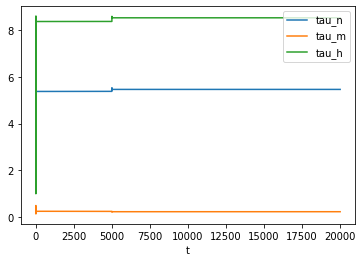

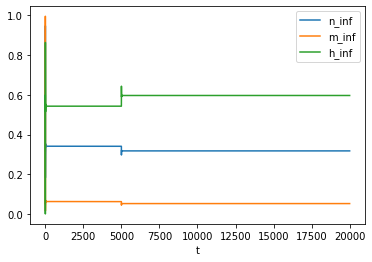

In [ ]:
plot(t_vec,tau_n_vec)
plot(t_vec,tau_m_vec)
plot(t_vec,tau_h_vec)
xlabel('t')
legend(['tau_n','tau_m','tau_h'],loc='upper right')
show()
plot(t_vec,n_inf_vec)
plot(t_vec,m_inf_vec)
plot(t_vec,h_inf_vec)
xlabel('t')
legend(['n_inf','m_inf','h_inf'],loc='upper right')
show()

##2.2

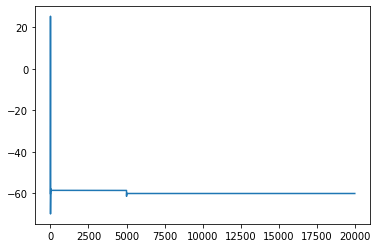

In [ ]:
plot(t_vec,v_vec)
show()

##2.3

first spike at Iext=0.0


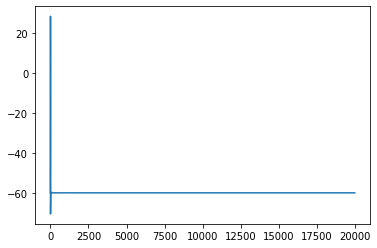

In [ ]:
t=0
Iext=0
n=0
m=0
h=0
v=vr
v_vec=[]
t_vec=[]
counter=0
spike1=False
while t<=Duration:
  t_vec+=[t]
  if counter>=500:
    Iext+=0.00
    counter=0
  else:
    counter+=1
  dv=(gl*(El-v)-gNa*m**3*h*(v-ENa)-gK*n**4*(v-EK)+Iext)/Cm*dt
  v_vec+=[v]
  ############
  u=vr-v
  alpha_n=(.1*u+1)/(exp(1+.1*u)-1)/10
  beta_n=.125*exp(u/80)
  tau_n=1/(alpha_n+beta_n)
  n_inf=alpha_n/(alpha_n+beta_n)
  #
  alpha_m=(u+25)/(exp(2.5+.1*u)-1)/10
  beta_m=4*exp(u/18)
  tau_m=1/(alpha_m+beta_m)
  m_inf=alpha_m/(alpha_m+beta_m)
  #
  alpha_h=.07*exp(u/20)
  beta_h=1/(1+exp(3+.1*u))
  tau_h=1/(alpha_h+beta_h)
  h_inf=alpha_h/(alpha_h+beta_h)
  ############
  dn=(-n+n_inf)/tau_n*dt
  dm=(-m+m_inf)/tau_m*dt
  dh=(-h+h_inf)/tau_h*dt
  ######
  v+=dv
  if v>20 and not spike1:
    print('first spike at Iext={}'.format(Iext))
    spike1=True
  n+=dn
  m+=dm
  h+=dh
  t+=dt
plot(t_vec,v_vec)
show()

##2.4

first spike at t=5.469999999999928


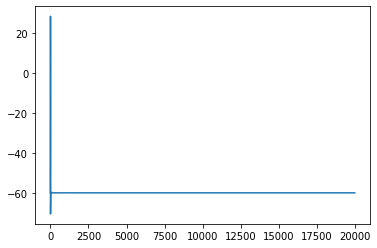

In [ ]:
t=0
Iext=0
n=0
m=0
h=0
v=vr
v_vec=[]
t_vec=[]
counter=0
spike1=False
while t<=Duration:
  t_vec+=[t]
  dv=(gl*(El-v)-gNa*m**3*h*(v-ENa)-gK*n**4*(v-EK)+Iext)/Cm*dt
  v_vec+=[v]
  ############
  u=vr-v
  alpha_n=(.1*u+1)/(exp(1+.1*u)-1)/10
  beta_n=.125*exp(u/80)
  tau_n=1/(alpha_n+beta_n)
  n_inf=alpha_n/(alpha_n+beta_n)
  #
  alpha_m=(u+25)/(exp(2.5+.1*u)-1)/10
  beta_m=4*exp(u/18)
  tau_m=1/(alpha_m+beta_m)
  m_inf=alpha_m/(alpha_m+beta_m)
  #
  alpha_h=.07*exp(u/20)
  beta_h=1/(1+exp(3+.1*u))
  tau_h=1/(alpha_h+beta_h)
  h_inf=alpha_h/(alpha_h+beta_h)
  ############
  dn=(-n+n_inf)/tau_n*dt
  dm=(-m+m_inf)/tau_m*dt
  dh=(-h+h_inf)/tau_h*dt
  ######
  v+=dv
  if v>20 and not spike1:
    print('first spike at t={}'.format(t))
    spike1=True
  n+=dn
  m+=dm
  h+=dh
  t+=dt
plot(t_vec,v_vec)
show()

##2.5

##2.6

#3

In [4]:
Tm=20*ms
El=-70*mV
IeRm=25*mV
Vt=-54*mV
rm=10*Mohm
taue=10*ms
Delay=5*ms
eqs_inh='''
dv/dt= (IeRm -(v-El)-gs*(v-0*mV)*rm)/Tm : volt
dgs/dt = (-1*gs)/(taue) : siemens
'''
eqs_exc='''
dv/dt = (IeRm-(v-El)-gs*(v+80*mV)*rm)/Tm : volt
dgs/dt = (-1*gs)/(taue) : siemens
'''

##3.1

In [15]:
start_scope()
G_E=NeuronGroup(1000,eqs_exc,threshold='v > Vt',method='exponential_euler')
G_I=NeuronGroup(1000,eqs_inh,threshold='v > Vt',method='exponential_euler')
G_E.v=El
G_I.v=El
S_exc2inh=Synapses(G_E,G_I,on_pre='gs_post+=5*nsiemens',delay=Delay)
S_exc2inh.connect(p=0.5)
S_exc2exc=Synapses(G_E,G_E,on_pre='gs_post+=5*nsiemens',delay=Delay)
S_exc2exc.connect(p=0.5)
S_inh2exc=Synapses(G_I,G_E,on_pre='gs_post+=5*nsiemens',delay=Delay)
S_inh2exc.connect(p=0.5)
S_inh2inh=Synapses(G_I,G_I,on_pre='gs_post+=5*nsiemens',delay=Delay)
S_inh2inh.connect(p=0.5)
M_E=StateMonitor(G_E,'v',record=True)
M_I=StateMonitor(G_I,'v',record=True)
run(1000*ms)

نورون های مهاری می خواهند به سمت  ولتاژ استراحت بروند 
اما در اثر فعالیت های نورون های همسایه (چه مهاری و چه تحریکی) و افزایش نمایی رسانایی  به سمت ولتاژ صفر می روند
نورون های تحریکی هم به همین صورت اما به سمت ولتاژ منفی هشتاد می روند.
بخاطر نقصان معادلات اثر نورون های مهاری بر مهاری بصورت تحریکی و اثر نورون های تحریکی بر تحریکی بصورت مهاری ظاهر می شود.
بالا رفتن اولیه ولتاژ در هر دو گروه بخاطر اثر جریان خارجی است

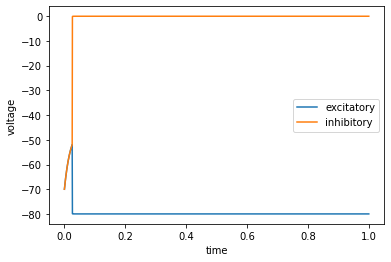

In [16]:
plot(M_E.t,np.mean(M_E.v/mV,axis=0))
plot(M_I.t,np.mean(M_I.v/mV,axis=0))
xlabel('time')
ylabel('voltage')
legend(['excitatory','inhibitory'])
show()

##3.2

الف)چون اثر مهاری بر مهاری از بین رفته در حالت پایدار در ولتاژ ۰ نمی ایستد

ب)فرقی با بخش یک نمی کند

ج)فرقی با بخش یک نمی کند.


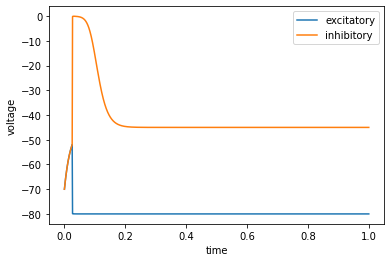

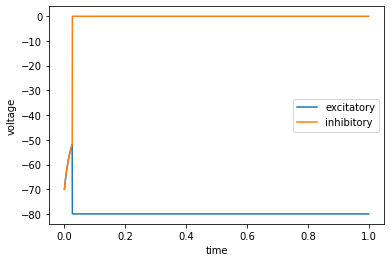

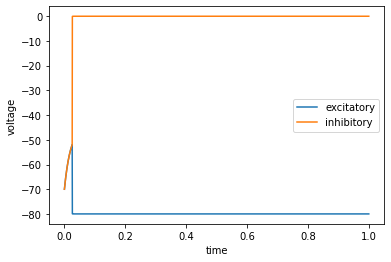

In [17]:
for ps in [[0,0,0.5,0.5],[1,1,0.5,0.5],[1,1,1,1]]:
  pii,pee,pei,pie=ps
  start_scope()
  G_E=NeuronGroup(1000,eqs_exc,threshold='v > Vt',method='exponential_euler')
  G_I=NeuronGroup(1000,eqs_inh,threshold='v > Vt',method='exponential_euler')
  G_E.v=El
  G_I.v=El
  S_exc2inh=Synapses(G_E,G_I,on_pre='gs_post+=5*nsiemens',delay=Delay)
  S_exc2inh.connect(p=pei)
  S_exc2exc=Synapses(G_E,G_E,on_pre='gs_post+=5*nsiemens',delay=Delay)
  S_exc2exc.connect(p=pee)
  S_inh2exc=Synapses(G_I,G_E,on_pre='gs_post+=5*nsiemens',delay=Delay)
  S_inh2exc.connect(p=pie)
  S_inh2inh=Synapses(G_I,G_I,on_pre='gs_post+=5*nsiemens',delay=Delay)
  S_inh2inh.connect(p=pii)
  M_E=StateMonitor(G_E,'v',record=True)
  M_I=StateMonitor(G_I,'v',record=True)
  run(1000*ms)
  plot(M_E.t,np.mean(M_E.v/mV,axis=0))
  plot(M_I.t,np.mean(M_I.v/mV,axis=0))
  xlabel('time')
  ylabel('voltage')
  legend(['excitatory','inhibitory'])
  show()

##3.3

بله .می توان.
کافی است جمله ی پیش برنده ولتاژ به سمت 

Vs 

(برای تحریکی ۰ و برای مهاری -۸۰)

را با ضریب

gs_prime

به معادله نورون های تحریکی و مهاری اضافه کنیم 
تا اثر نورون های مهاری بر مهاری بصورت مهاری 
و نورون های تحریکی بر تحریکی بصورت تحریکی ظاهر شود
